In [457]:
import json
import requests as req
from config import apikey

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

In [2]:
url=f"https://lcboapi.com/products?access_key={apikey}"
LCBO_data=req.get(url, params={"per_page": 6}).json()

In [6]:
#data=req.get('https://lcboapi.com/stores', headers={"Authorization": f"Token {apikey}"}).json()

In [440]:
def make_requests(page_url=None):
    base_url = 'https://lcboapi.com'
    if page_url == None:
        url = f"{base_url}/products?access_key={apikey}"
        print(url)
        first_page = req.get(url, params={"per_page": 100}).json()
        new_url = f"{base_url}/{first_page['pager']['next_page_path']}"
        print(new_url)
        print('111')
        yield first_page["result"]
        yield from make_requests(new_url)
    else:
        page = req.get(page_url, params={"per_page": 100}).json()
        new_url = f"{base_url}/{page['pager']['next_page_path']}"
        yield page["result"]
        yield from make_requests(new_url)
        

data=[]

for i, x in enumerate(make_requests()):
    if i > 50:
        break
    print(x)
    #print(len(x))
    data.append(x)

In [442]:

datas=[]

for i, x in enumerate(make_requests()):
    if i > 15:
        break
    for i in range(len(x)):
        for k,v in x[i].items():
            #doing so, so to be able to add to df 
            x[i][k]=[v]

        data=pd.DataFrame(x[i])
        datas.append(data)


https://lcboapi.com/products?access_key=MDpmZDZkZGY5MC1kNTZhLTExZTctYjkyNi1lYjI0YTMyN2IzNGU6a0YyUWcwYlRZVFdRU2IxS2dmYzBNa2xuUkt1WTlIUGJBaEtl
https://lcboapi.com//products?access_key=MDpmZDZkZGY5MC1kNTZhLTExZTctYjkyNi1lYjI0YTMyN2IzNGU6a0YyUWcwYlRZVFdRU2IxS2dmYzBNa2xuUkt1WTlIUGJBaEtl&per_page=100&page=2
111


In [443]:
len(data[0])

100

In [444]:
df=datas[0]

for i in range(1, len(datas)):
    print(i)
    data=datas[i]
    df=df.append(data)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [445]:
df.shape

(1600, 50)

In [454]:
len(df.id.unique()) # check for unique id are equal to raw count

1600

In [462]:
df = df.set_index('id')

In [463]:
df[
alcohol_content
inventory_count
inventory_price_in_cents
inventory_volume_in_milliliters
is_dead
is_discontinued
is_kosher
is_ocb
is_seasonal
is_vqa
package_unit_volume_in_milliliters
price_in_cents
price_per_liter_in_cents
price_per_liter_of_alcohol_in_cents
volume_in_milliliters]

,alcohol_content,bonus_reward_miles,bonus_reward_miles_ends_on,clearance_sale_savings_in_cents,description,has_bonus_reward_miles,has_clearance_sale,has_limited_time_offer,has_value_added_promotion,image_thumb_url,image_url,inventory_count,inventory_price_in_cents,inventory_volume_in_milliliters,is_dead,is_discontinued,is_kosher,is_ocb,is_seasonal,is_vqa,limited_time_offer_ends_on,limited_time_offer_savings_in_cents,name,origin,package,package_unit_type,package_unit_volume_in_milliliters,price_in_cents,price_per_liter_in_cents,price_per_liter_of_alcohol_in_cents,primary_category,producer_name,product_no,regular_price_in_cents,released_on,secondary_category,serving_suggestion,stock_type,style,sugar_content,sugar_in_grams_per_liter,tags,tasting_note,tertiary_category,total_package_units,updated_at,value_added_promotion_description,varietal,volume_in_milliliters
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
311787,500,0,None,0,None,False,False,False,False,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,66979,97119550,190086402,False,False,False,False,False,False,None,0,Budweiser,"Canada, Ontario",6x473 mL can,can,473,1450,510,1021,Beer,Labatt Breweries Ontario,311787,1450,None,Lager,None,LCBO,Light & Malty,None,None,budweiser beer lager canada ontario labatt bre...,None,Pale Lager,6,2017-11-30T14:19:14.888Z,None,North American Lager,2838
300681,400,0,None,0,None,False,False,False,False,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,61364,88977800,174151032,False,False,False,False,False,False,None,0,Coors Light,"Canada, Ontario",6x473 mL can,can,473,1450,510,1277,Beer,Molson's Brewery of Canada Limited,300681,1450,None,Lager,None,LCBO,Light & Malty,None,None,coors light beer lager canada ontario molson's...,None,Light Lager,6,2017-11-30T14:22:15.293Z,None,Light Lager,2838
300699,500,0,None,0,None,False,False,True,False,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,59647,80523450,169278186,False,False,False,False,False,False,2017-12-31,100,Molson Canadian,"Canada, Ontario",6x473 mL can,can,473,1350,475,951,Beer,Molson's Brewery of Canada Limited,300699,1450,None,Lager,None,LCBO,Light & Malty,None,None,molson canadian beer lager canada ontario mols...,None,Pale Lager,6,2017-11-30T14:32:12.472Z,None,North American Lager,2838
696161,470,0,None,0,None,False,False,False,False,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,46917,57942495,133150446,False,False,False,False,False,False,None,0,Busch,"Canada, Ontario",6x473 mL can,can,473,1235,435,925,Beer,Labatt Breweries Ontario,696161,1235,None,Lager,None,LCBO,Light & Malty,None,None,busch beer lager canada ontario labatt breweri...,None,Pale Lager,6,2017-11-30T14:19:22.422Z,None,North American Lager,2838
186510,459,0,None,0,None,False,False,True,False,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,58464,77464800,115758720,False,False,False,False,False,False,2017-12-31,125,Corona Extra,"Mexico, Region Not Specified",6x330 mL bottle,bottle,330,1325,669,1457,Beer,Cerveceria Modelo Sa de Cv,186510,1450,None,Lager,None,LCBO,Light & Malty,None,None,corona extra beer lager mexico region not spec...,None,Pale Lager,6,2017-11-30T14:22:19.213Z,None,North American Lager,1980
311779,400,0,None,0,None,False,False,False,False,https://dx5vpyka4lqst.cloudfront.net/products/...,https://dx5vpyka4lqst.cloudfront.net/products/...,40497,58720650,114930486,False,False,False,False,False,False,None,0,Bud Light,"Canada, Ontario",6x473 mL can,can,473,1450,510,1277,Beer,Labatt Breweries Ontario,311779,1450,None,Lager,None,LCBO,Light & Malty,None,None,bud light beer lager canada ontario labatt bre...,None,Light Lager,6,2017-11-30T14:19:12.699Z,None,Light Lager,2838
367938,500,0,None,0,None,False,False,True,False,https://dx5vpyka4lqst.cloudfront.net/p

In [460]:
pd.options.display.max_columns = 100
df_select_int=df.loc[:, df.dtypes == np.int64]

In [481]:
datalist=df_select_int.columns.tolist()
datalist

['alcohol_content',
 'bonus_reward_miles',
 'clearance_sale_savings_in_cents',
 'inventory_count',
 'inventory_price_in_cents',
 'inventory_volume_in_milliliters',
 'limited_time_offer_savings_in_cents',
 'package_unit_volume_in_milliliters',
 'price_in_cents',
 'price_per_liter_in_cents',
 'price_per_liter_of_alcohol_in_cents',
 'product_no',
 'regular_price_in_cents',
 'total_package_units',
 'volume_in_milliliters']

In [482]:
test=['alcohol_content',
 'inventory_count',
 'package_unit_volume_in_milliliters',
 'price_per_liter_in_cents',
 'price_per_liter_of_alcohol_in_cents',
 'total_package_units',
 'volume_in_milliliters']
test

['alcohol_content',
 'inventory_count',
 'package_unit_volume_in_milliliters',
 'price_per_liter_in_cents',
 'price_per_liter_of_alcohol_in_cents',
 'total_package_units',
 'volume_in_milliliters']

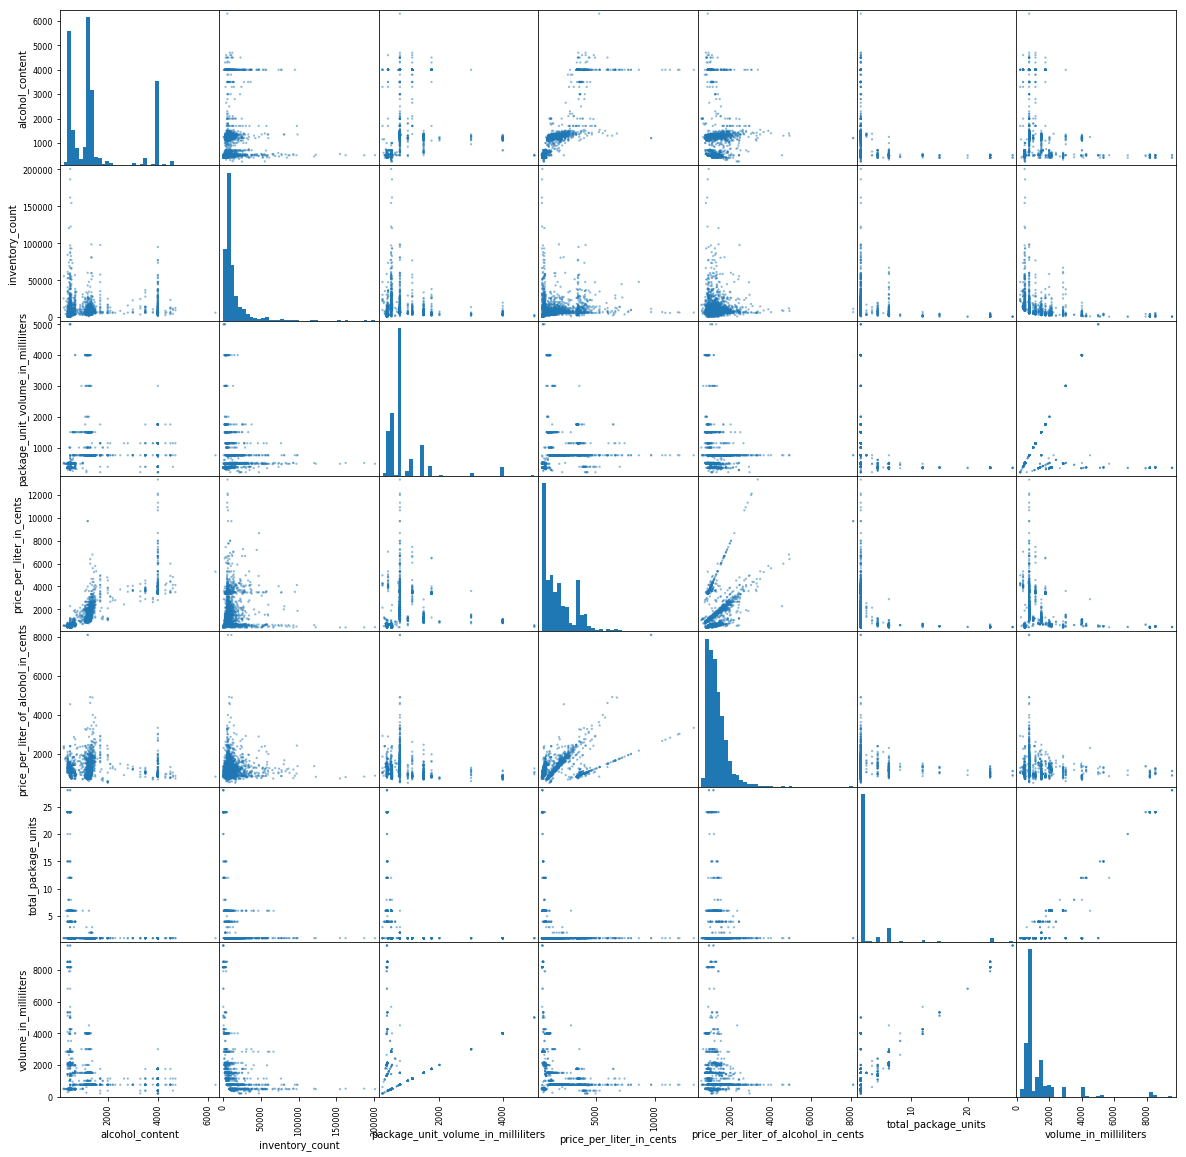

In [493]:
pd.plotting.scatter_matrix(df_select_int[test],figsize=(20, 20),
                                 hist_kwds={'bins': 40}, s=20, alpha=.5);
plt.savefig('LCBO_eda_data')
plt.show()

In [492]:
df.to_csv('LCBO_data.csv')